# Final Project

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from IPython.display import display

#SK-learn libraries for setup
from sklearn.model_selection import train_test_split

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report


/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [122]:
#Read data
os.chdir("/Users/nwchen24/Desktop/UC_Berkeley/machine_learning/github_repo/Winter2017_Section_3/NC_Work/Final_Project/Data/")

train_data_full = pd.read_csv('train.csv')
train_data_full.head()

#Split into train and development
train_data, dev_data = train_test_split(train_data, random_state = 0)


## EDA

In [132]:
#Add a string desctriptor for weather
weather_values = [1,2,3,4]
weather_descriptions = ['Nice Weather', 'OK Weather', 'Poor Weather', 'Bad Weather']
weather_dict_df = pd.DataFrame({'weather' : weather_values, 'weather_descriptions': weather_descriptions})

weather_dict_df
train_data = pd.merge(train_data, weather_dict_df, how = 'left')

#Add a string descriptor for season
season_values = [1,2,3,4]
season_str = ['Spring', 'Summer', 'Fall', 'Winter']
season_dict_df = pd.DataFrame({'season' : season_values, 'season_str': season_str})

train_data = pd.merge(train_data, season_dict_df, how = 'left')

train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_descriptions,season_str
0,2011-03-08 11:00:00,1,0,1,2,14.76,17.425,25,11.0014,26,52,78,OK Weather,Spring
1,2012-06-03 06:00:00,2,0,0,1,18.86,22.725,82,7.0015,6,16,22,Nice Weather,Summer
2,2012-10-12 20:00:00,4,0,1,1,17.22,21.210,47,8.9981,28,280,308,Nice Weather,Winter
3,2012-11-01 13:00:00,4,0,1,2,16.40,20.455,58,11.0014,49,199,248,OK Weather,Winter
4,2011-01-08 16:00:00,1,0,0,1,7.38,6.820,29,30.0026,8,68,76,Nice Weather,Spring


In [ ]:

train_data.describe()

### Univariate Plots

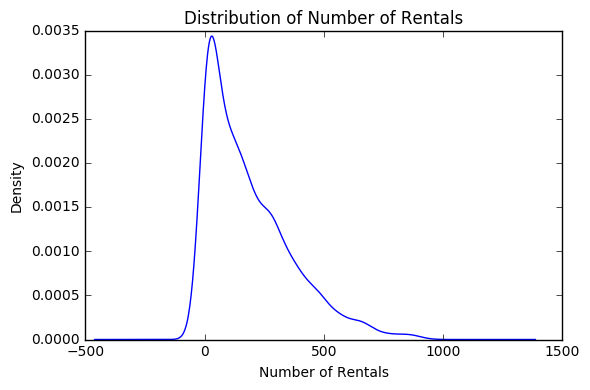

In [87]:
#Look at the count variable
#Number of Rentals
plt.figure()
train_data['count'].plot(kind = 'density')
plt.title('Distribution of Number of Rentals')
plt.xlabel('Number of Rentals')

plt.tight_layout()
plt.show()


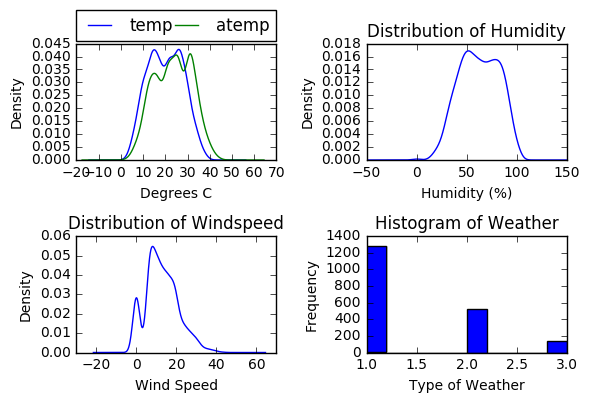

In [124]:
#Temperatures
plt.subplot(2,2,1)
train_data['temp'].plot(kind = 'density')
train_data['atemp'].plot(kind = 'density')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Degrees C')

#Humidity
plt.subplot(2,2,2)
train_data['humidity'].plot(kind = 'density')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')

#Windspeed
plt.subplot(2,2,3)
train_data['windspeed'].plot(kind = 'density')
plt.title('Distribution of Windspeed')
plt.xlabel('Wind Speed')

#Weather
plt.subplot(2,2,4)
train_data['weather'].plot(kind = 'hist')
plt.title('Histogram of Weather')
plt.xlabel('Type of Weather')

plt.tight_layout()
plt.show()

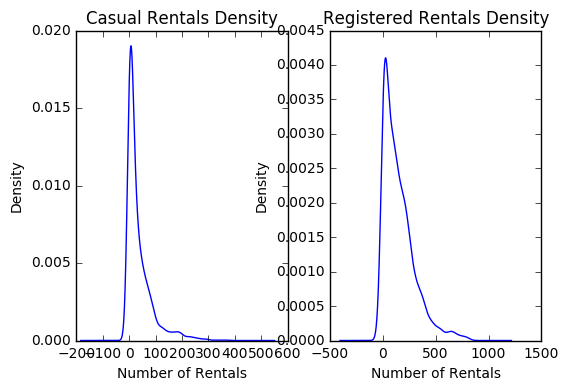

In [89]:
#Look at distributions of casual rentals vs. registered rentals
plt.figure()

#Casual
plt.subplot(1,2,1)
train_data['casual'].plot(kind = 'density')
plt.xlabel('Number of Rentals')
plt.title('Casual Rentals Density')

#Registered
plt.subplot(1,2,2)
train_data['registered'].plot(kind = 'density')
plt.xlabel('Number of Rentals')
plt.title('Registered Rentals Density')

plt.show()

### Bivariate Plots

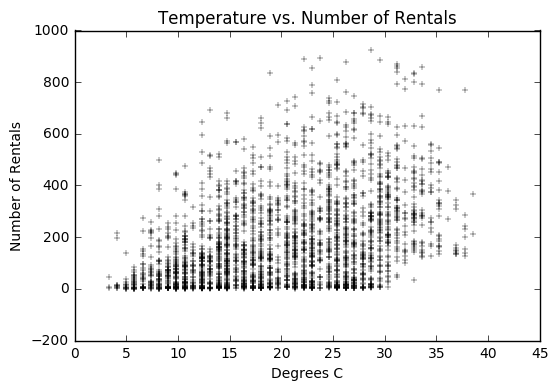

In [104]:
#Temperature vs. Number of Rentals
plt.figure()
train_data.plot(x = 'temp', y = 'count', kind = 'scatter', marker = '+', linewidths = .3, c = 'black')
plt.title('Temperature vs. Number of Rentals')
plt.xlabel('Degrees C')
plt.ylabel('Number of Rentals')

plt.show()


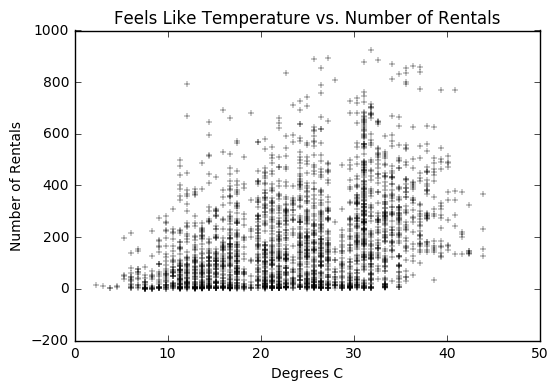

In [105]:
#Feels Like Temperature vs. Number of Rentals
plt.figure()
train_data.plot(x = 'atemp', y = 'count', kind = 'scatter', marker = '+', linewidths = .3, c = 'black')
plt.title('Feels Like Temperature vs. Number of Rentals')
plt.xlabel('Degrees C')
plt.ylabel('Number of Rentals')

plt.show()


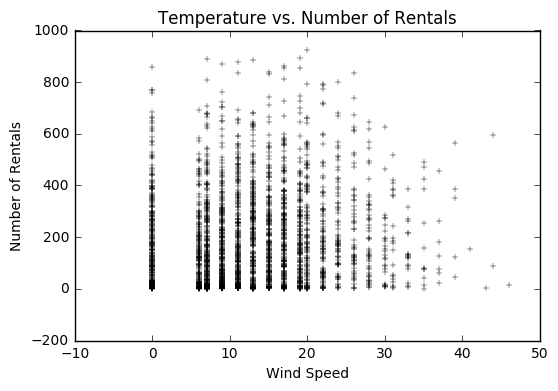

In [103]:
#Wind Speed vs. Number of Rentals
plt.figure()
train_data.plot(x = 'windspeed', y = 'count', kind = 'scatter', marker = '+', linewidths = .3, c = 'black')
plt.title('Wind Speed vs. Number of Rentals')
plt.xlabel('Wind Speed')
plt.ylabel('Number of Rentals')

plt.show()

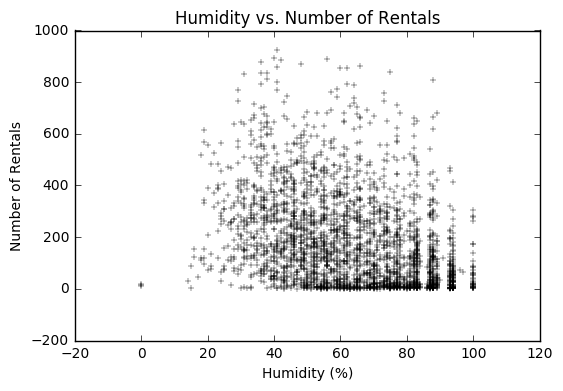

In [106]:
#Humidity vs. Number of Rentals
plt.figure()
train_data.plot(x = 'humidity', y = 'count', kind = 'scatter', marker = '+', linewidths = .3, c = 'black')
plt.title('Humidity vs. Number of Rentals')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Rentals')

plt.show()

Poor weather has the highest density of zero and very low rentals

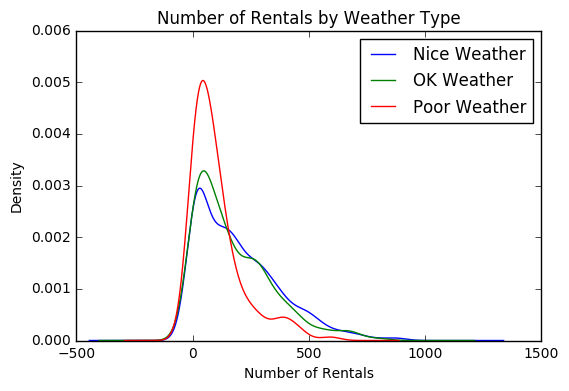

In [126]:
#rentals grouped by weather type
plt.figure()
train_data.groupby(by = ['weather_descriptions'])['count'].plot(kind='density')
plt.legend()
plt.title('Number of Rentals by Weather Type')
plt.xlabel('Number of Rentals')
plt.show()

Fall, Winter, and Summer seem to have more days with higher rental totals

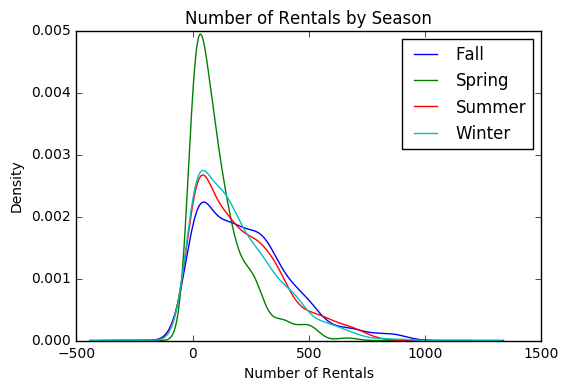

In [128]:
#rentals grouped by season
plt.figure()
train_data.groupby(by = ['season_str'])['count'].plot(kind='density')
plt.legend()
plt.title('Number of Rentals by Season')
plt.xlabel('Number of Rentals')
plt.show()

Holidays and Non-Holidays look pretty similar

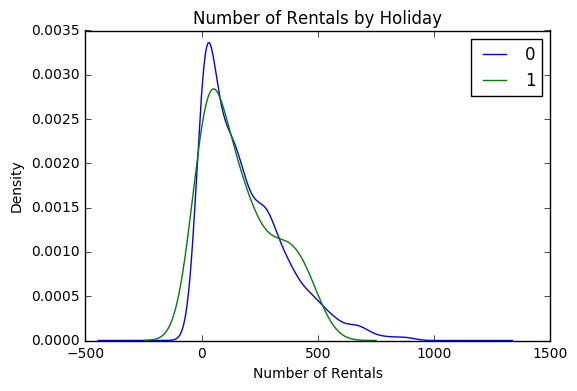

In [129]:
#rentals grouped by holiday or not
plt.figure()
train_data.groupby(by = ['holiday'])['count'].plot(kind='density')
plt.legend()
plt.title('Number of Rentals by Holiday')
plt.xlabel('Number of Rentals')
plt.show()

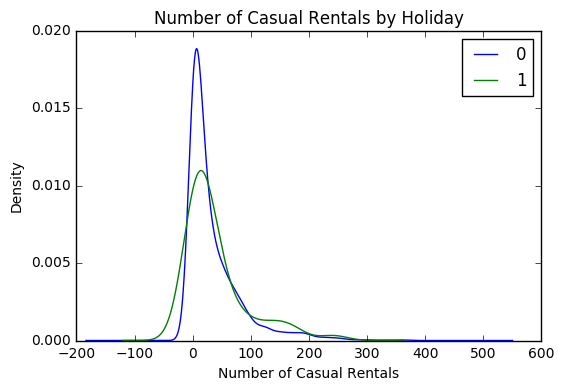

In [130]:
#Number of casual rentals grouped by holiday or not
plt.figure()
train_data.groupby(by = ['holiday'])['casual'].plot(kind='density')
plt.legend()
plt.title('Number of Casual Rentals by Holiday')
plt.xlabel('Number of Casual Rentals')
plt.show()

### Temporal Plots

In [137]:
train_data_ts = train_data.set_index('datetime')

train_data_ts.index.name = None

train_data_ts.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_descriptions,season_str
2011-03-08 11:00:00,1,0,1,2,14.76,17.425,25,11.0014,26,52,78,OK Weather,Spring
2012-06-03 06:00:00,2,0,0,1,18.86,22.725,82,7.0015,6,16,22,Nice Weather,Summer
2012-10-12 20:00:00,4,0,1,1,17.22,21.210,47,8.9981,28,280,308,Nice Weather,Winter
2012-11-01 13:00:00,4,0,1,2,16.40,20.455,58,11.0014,49,199,248,OK Weather,Winter
2011-01-08 16:00:00,1,0,0,1,7.38,6.820,29,30.0026,8,68,76,Nice Weather,Spring


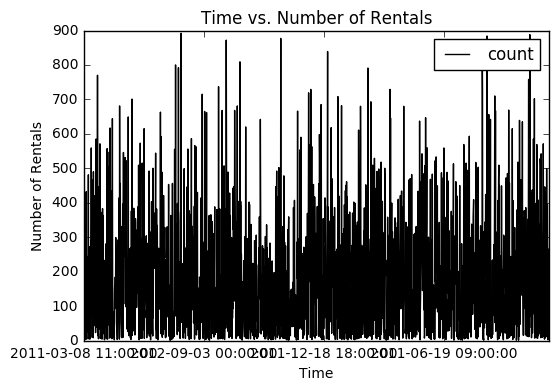

In [142]:
#Time series plot of rentals
#Split into quarters


plt.figure()
train_data_ts.plot(y = 'count', c = 'black')
plt.title('Time vs. Number of Rentals')
plt.xlabel('Time')
plt.ylabel('Number of Rentals')

plt.show()